In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('tiktok_dataset.csv')

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# we dont need '#' column because we already have index 
data=data.drop(columns='#')

In [5]:
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


# EDA

In [6]:
data.isnull().sum()

claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
# Replace NaN values with an empty string
data['claim_status'] = data['claim_status'].fillna('Unknown')

In [8]:
# lets see which values in categorical column
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Unknown     298
Name: count, dtype: int64

In [9]:
data['verified_status'].value_counts()

verified_status
not verified    18142
verified         1240
Name: count, dtype: int64

In [10]:
data['author_ban_status'].value_counts()

author_ban_status
active          15663
under review     2080
banned           1639
Name: count, dtype: int64

What is the distribution of video durations, and is there a typical length for videos on the platform?

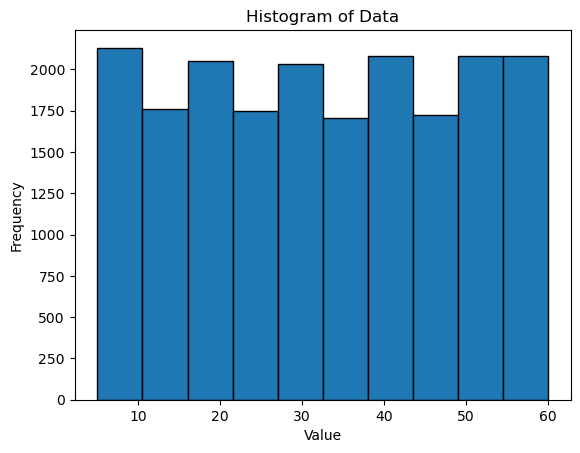

In [11]:
plt.hist(data['video_duration_sec'], bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

In [12]:
mean_duration = np.mean(data['video_duration_sec'])
mean_duration

32.42173150345682

How do the engagement metrics (views, likes, shares, downloads, comments) correlate with each other? Are there any strong relationships?

In [13]:
data.columns

Index(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [14]:
engagements = data.drop(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status'], axis=1)

In [15]:
engagements.head()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,343296.0,19425.0,241.0,1.0,0.0
1,140877.0,77355.0,19034.0,1161.0,684.0
2,902185.0,97690.0,2858.0,833.0,329.0
3,437506.0,239954.0,34812.0,1234.0,584.0
4,56167.0,34987.0,4110.0,547.0,152.0


In [16]:
engagements.corr()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
video_view_count,1.000000,0.804322,0.665635,0.664222,0.554172
video_like_count,0.804322,1.000000,0.825789,0.823554,0.687185
video_share_count,0.665635,0.825789,1.000000,0.679910,0.574632
video_download_count,0.664222,0.823554,0.679910,1.000000,0.832464
video_comment_count,0.554172,0.687185,0.574632,0.832464,1.000000


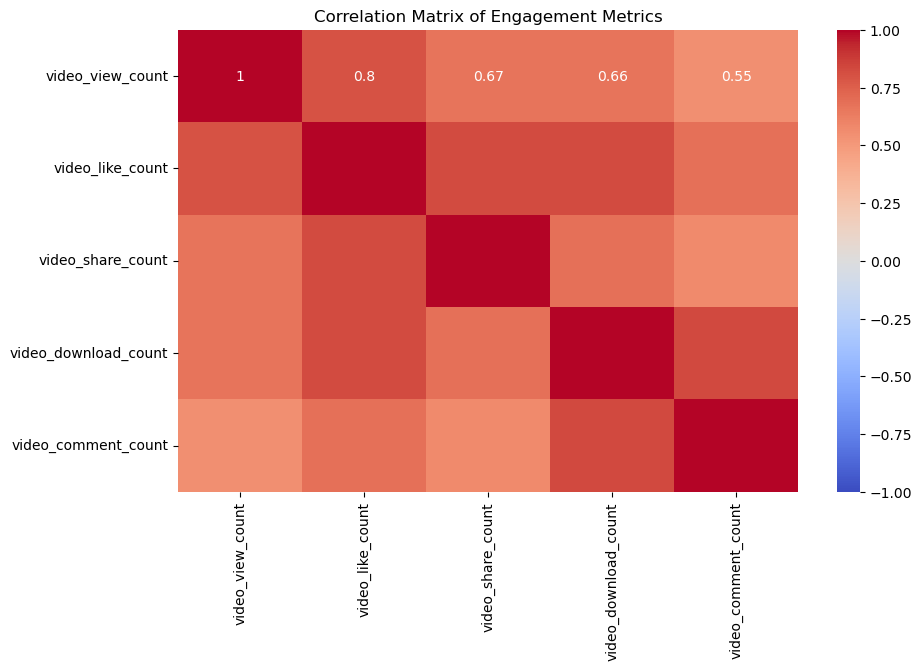

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(engagements.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

What percentage of videos in the dataset are from verified users, and how does this compare to the percentage of videos containing claims?

In [18]:
data['verified_status'].value_counts(normalize=True) * 100

verified_status
not verified    93.602311
verified         6.397689
Name: proportion, dtype: float64

In [19]:
data['claim_status'].value_counts(normalize=True) * 100

claim_status
claim      49.571768
opinion    48.890723
Unknown     1.537509
Name: proportion, dtype: float64

What is the average engagement rate (e.g., likes per view) across all videos, and how does this vary between videos with and without claims?

In [20]:
data.columns

Index(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [21]:
data.loc[(data['claim_status']=='claim'), "video_like_count"].median()

123649.0

In [22]:
data.loc[(data['claim_status']!='claim'), "video_like_count"].median()

823.0

In [23]:
data.loc[(data['claim_status']=='claim'), "video_view_count"].median()

501555.0

In [24]:
data.loc[(data['claim_status']!='claim'), "video_view_count"].median()

4953.0

In [25]:
data.loc[(data['claim_status']=='claim'), "video_share_count"].median()

17997.5

In [26]:
data.loc[(data['claim_status']!='claim'), "video_share_count"].median()

121.0

In [27]:
data.loc[(data['claim_status']=='claim'), "video_download_count"].median()

1139.5

In [28]:
data.loc[(data['claim_status']!='claim'), "video_download_count"].median()

7.0

Is there a relationship between the length of the video transcription text and the number of views or other engagement metrics?

In [29]:
# Replace NaN values with an empty string
data['video_transcription_text'] = data['video_transcription_text'].fillna('')


In [30]:
# Calculate transcription length
data['transcription_length'] = data['video_transcription_text'].apply(lambda x: len(x.split()))

In [31]:
engagements = data.drop(['claim_status', 'video_id',
       'video_transcription_text', 'verified_status', 'author_ban_status'], axis=1)

In [32]:
engagements.corr()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
video_duration_sec,1.000000,0.008481,0.011567,0.011560,0.013078,0.000615,-0.002975
video_view_count,0.008481,1.000000,0.804322,0.665635,0.664222,0.554172,0.233139
video_like_count,0.011567,0.804322,1.000000,0.825789,0.823554,0.687185,0.184040
video_share_count,0.011560,0.665635,0.825789,1.000000,0.679910,0.574632,0.148555
video_download_count,0.013078,0.664222,0.823554,0.679910,1.000000,0.832464,0.147130
video_comment_count,0.000615,0.554172,0.687185,0.574632,0.832464,1.000000,0.129173
transcription_length,-0.002975,0.233139,0.184040,0.148555,0.147130,0.129173,1.000000


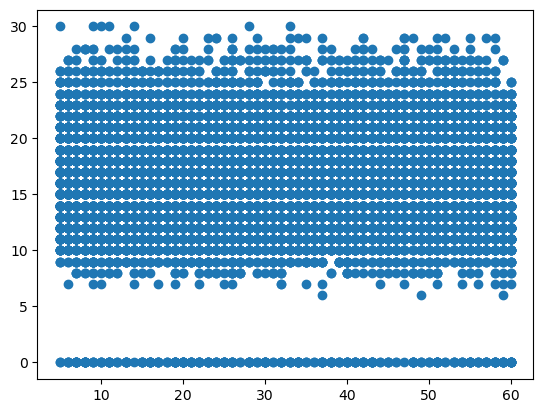

In [33]:
plt.scatter(data['video_duration_sec'],data['transcription_length'])

Compare claim_status across different verified_status and author_ban_status categories

In [34]:
# Group by verified_status and author_ban_status, and count occurrences of claim_status
grouped = data.groupby(['verified_status', 'author_ban_status', 'claim_status']).size().unstack(fill_value=0)
print(grouped)


claim_status                       Unknown  claim  opinion
verified_status author_ban_status                         
not verified    active                 244   6407     7898
                banned                   3   1417      173
                under review            11   1575      414
verified        active                  36    159      919
                banned                   1     22       23
                under review             3     28       49


In [35]:
# Create a pivot table
pivot_table = data.pivot_table(index=['verified_status', 'author_ban_status'], 
                             columns='claim_status', 
                             aggfunc='size', 
                             fill_value=0)
print(pivot_table)


claim_status                       Unknown  claim  opinion
verified_status author_ban_status                         
not verified    active                 244   6407     7898
                banned                   3   1417      173
                under review            11   1575      414
verified        active                  36    159      919
                banned                   1     22       23
                under review             3     28       49


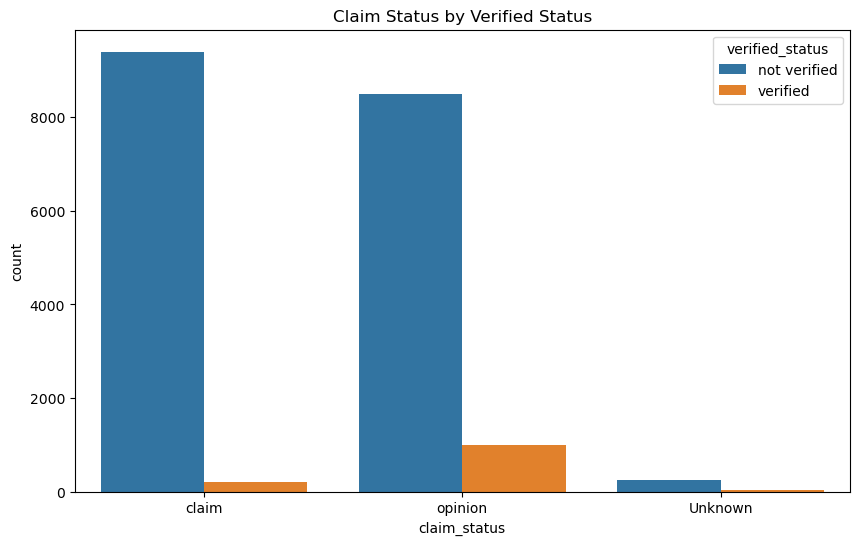

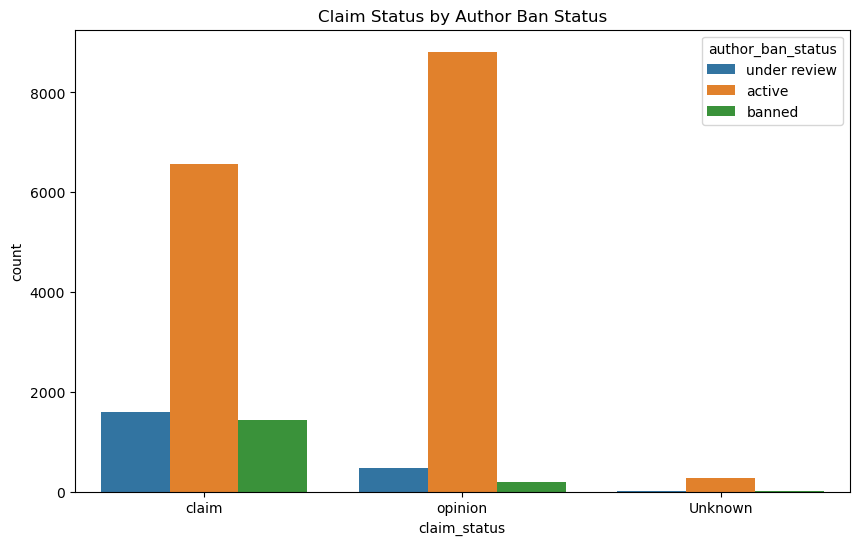

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='claim_status', hue='verified_status', data=data)
plt.title('Claim Status by Verified Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='claim_status', hue='author_ban_status', data=data)
plt.title('Claim Status by Author Ban Status')
plt.show()


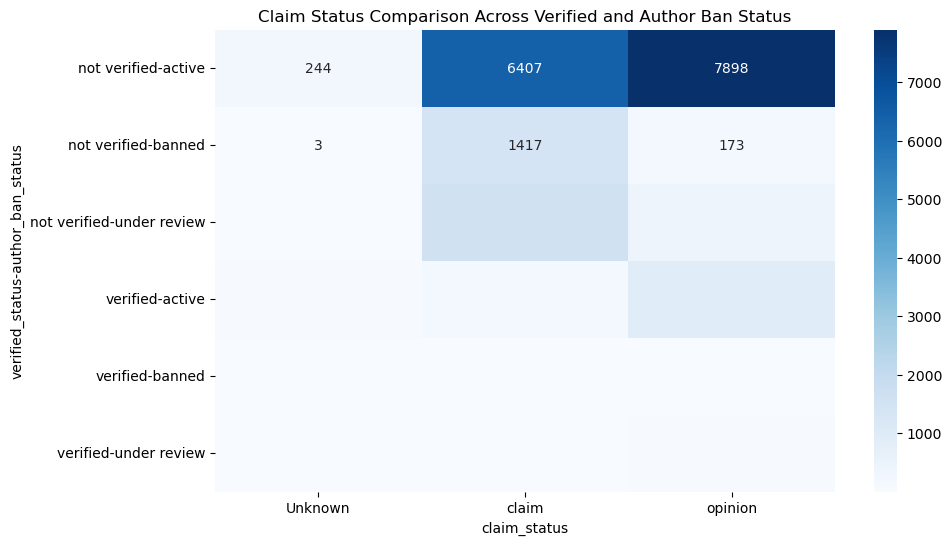

In [37]:
# Heatmap of the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Claim Status Comparison Across Verified and Author Ban Status')
plt.show()


Calculate engagement rates (e.g., likes/views, comments/views)

In [38]:
df = pd.DataFrame()

In [39]:
# Avoid division by zero by replacing 0 with a small number (e.g., 1) in the 'views' column
data['video_view_count'].replace(0, 1, inplace=True)

# Recalculate engagement rates
df['likes_per_view'] = data['video_like_count'] / data['video_view_count']
df['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
df['downloads_per_view'] = data['video_download_count'] / data['video_view_count']
df['shares_per_view'] = data['video_share_count'] / data['video_view_count']


In [40]:
df.head()

,likes_per_view,comments_per_view,downloads_per_view,shares_per_view
0,0.056584,0.000000,0.000003,0.000702
1,0.549096,0.004855,0.008241,0.135111
2,0.108282,0.000365,0.000923,0.003168
3,0.548459,0.001335,0.002821,0.079569
4,0.622910,0.002706,0.009739,0.073175


Analyze the relationship between verified_status and claim_status

In [41]:
crosstab = pd.crosstab(data['verified_status'], data['claim_status'])
print(crosstab)

claim_status     Unknown  claim  opinion
verified_status                         
not verified         258   9399     8485
verified              40    209      991


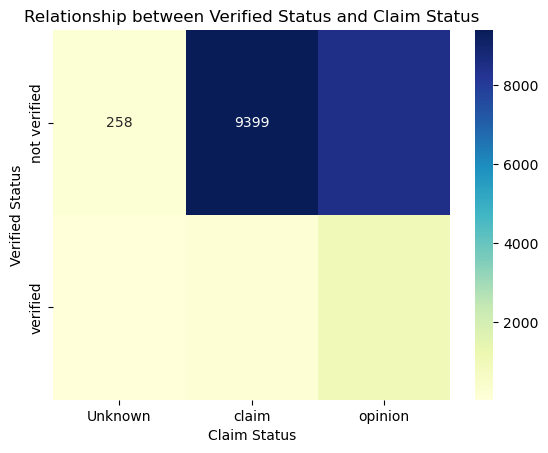

In [42]:
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relationship between Verified Status and Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("Verified Status")
plt.show()

Investigate if author_ban_status correlates with likelihood of making claims

In [43]:
crosstab = pd.crosstab(data['author_ban_status'], data['claim_status'])
print(crosstab)

claim_status       Unknown  claim  opinion
author_ban_status                         
active                 280   6566     8817
banned                   4   1439      196
under review            14   1603      463


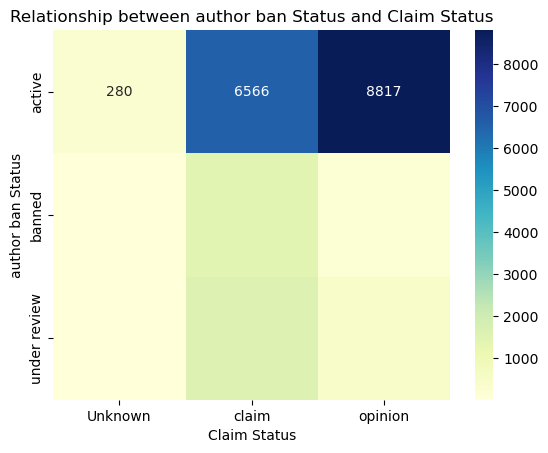

In [44]:
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relationship between author ban Status and Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("author ban Status")
plt.show()

Examine if video duration correlates with likelihood of containing a claim

In [45]:
data.columns

Index(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'transcription_length'],
      dtype='object')

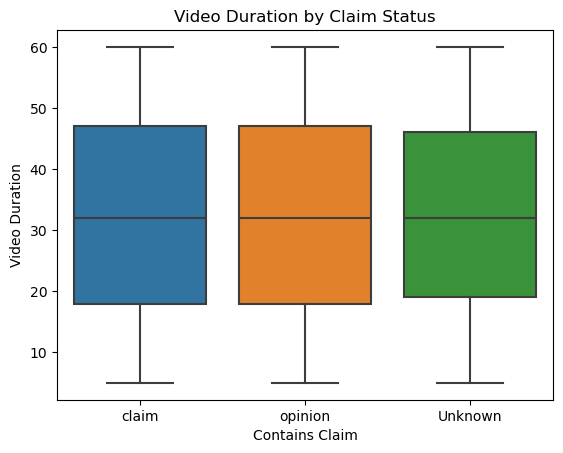

In [46]:
sns.boxplot(x='claim_status', y='video_duration_sec', data=data)
plt.title("Video Duration by Claim Status")
plt.xlabel("Contains Claim")
plt.ylabel("Video Duration")
plt.show()


In [47]:
# Step 2: Descriptive statistics for video duration grouped by claim presence
grouped_stats = data.groupby('claim_status')['video_duration_sec'].describe()
print(grouped_stats)

               count       mean        std  min   25%   50%   75%   max
claim_status                                                           
Unknown        298.0  32.288591  16.479472  5.0  19.0  32.0  46.0  60.0
claim         9608.0  32.486886  16.172409  5.0  18.0  32.0  47.0  60.0
opinion       9476.0  32.359856  16.281705  5.0  18.0  32.0  47.0  60.0


Create a correlation matrix to identify relationships between numeric variables

In [48]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericcolumns = data.select_dtypes(include=numerics)

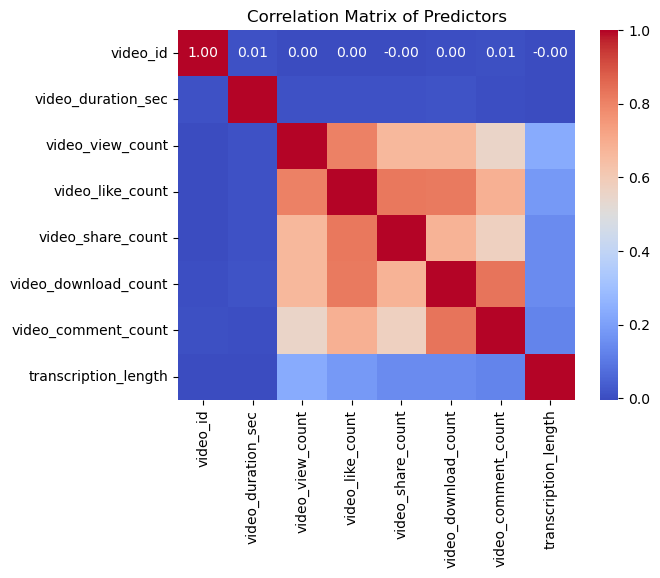

In [49]:
# Assuming df is your DataFrame with predictors
# Calculate the correlation matrix
corr_matrix = numericcolumns.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Predictors")
plt.show()

# Data Preprocessing

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19382 non-null  object 
 1   video_id                  19382 non-null  int64  
 2   video_duration_sec        19382 non-null  int64  
 3   video_transcription_text  19382 non-null  object 
 4   verified_status           19382 non-null  object 
 5   author_ban_status         19382 non-null  object 
 6   video_view_count          19084 non-null  float64
 7   video_like_count          19084 non-null  float64
 8   video_share_count         19084 non-null  float64
 9   video_download_count      19084 non-null  float64
 10  video_comment_count       19084 non-null  float64
 11  transcription_length      19382 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [51]:
data.isnull().sum()

claim_status                  0
video_id                      0
video_duration_sec            0
video_transcription_text      0
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
transcription_length          0
dtype: int64

In [52]:
data['video_view_count'].fillna(int(data['video_view_count'].mean()), inplace=True) 
data['video_like_count'].fillna(int(data['video_like_count'].mean()), inplace=True) 
data['video_share_count'].fillna(int(data['video_share_count'].mean()), inplace=True) 
data['video_download_count'].fillna(int(data['video_download_count'].mean()), inplace=True) 
data['video_comment_count'].fillna(int(data['video_comment_count'].mean()), inplace=True) 

In [53]:
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,16
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,19
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,23
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,24
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,22


In [54]:
# there is no duplicated rows in dataset
data.duplicated().sum()

0

In [55]:
data.drop('video_id',axis=1,inplace=True)

In [56]:
data.drop('video_transcription_text',axis=1,inplace=True)

In [57]:
data.head()

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,16
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,19
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,23
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,24
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,22


In [58]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['claim_status']= label_encoder.fit_transform(data['claim_status']) 

In [66]:
data=pd.get_dummies(data)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   claim_status                    19382 non-null  int64  
 1   video_duration_sec              19382 non-null  int64  
 2   video_view_count                19382 non-null  float64
 3   video_like_count                19382 non-null  float64
 4   video_share_count               19382 non-null  float64
 5   video_download_count            19382 non-null  float64
 6   video_comment_count             19382 non-null  float64
 7   transcription_length            19382 non-null  int64  
 8   verified_status_not verified    19382 non-null  int64  
 9   verified_status_verified        19382 non-null  int64  
 10  author_ban_status_active        19382 non-null  int64  
 11  author_ban_status_banned        19382 non-null  int64  
 12  author_ban_status_under review  

In [68]:
data['verified_status_not verified'] = data['verified_status_not verified'].astype(int)

In [70]:
data['verified_status_verified'] = data['verified_status_verified'].astype(int)
data['author_ban_status_active'] = data['author_ban_status_active'].astype(int)
data['author_ban_status_banned'] = data['author_ban_status_banned'].astype(int)
data['author_ban_status_under review'] = data['author_ban_status_under review'].astype(int)

In [72]:
data.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,16,1,0,0,0,1
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,19,1,0,1,0,0
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,23,1,0,1,0,0
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,24,1,0,1,0,0
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,22,1,0,1,0,0


In [87]:
# Apply log transformation
data['video_download_count'] = np.log1p(data['video_download_count'])  # log1p handles log(0) by adding 1


(array([4245., 5286., 2327., 4324., 3200.]),
 array([0.        , 1.92309442, 3.84618884, 5.76928325, 7.69237767,
        9.61547209]),
 <BarContainer object of 5 artists>)

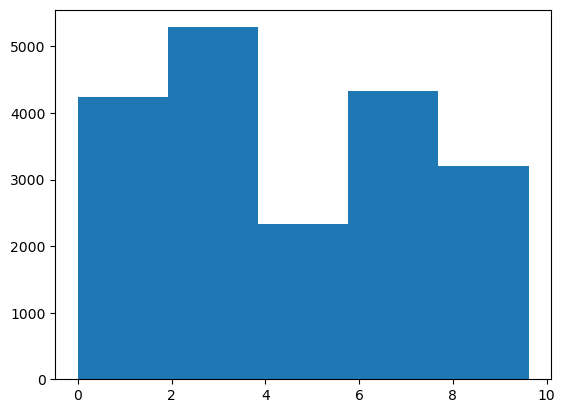

In [88]:
plt.hist(data['video_download_count'],bins=5)

In [89]:
# Apply log transformation
data['video_comment_count'] = np.log1p(data['video_comment_count'])  # log1p handles log(0) by adding 1


<Axes: >

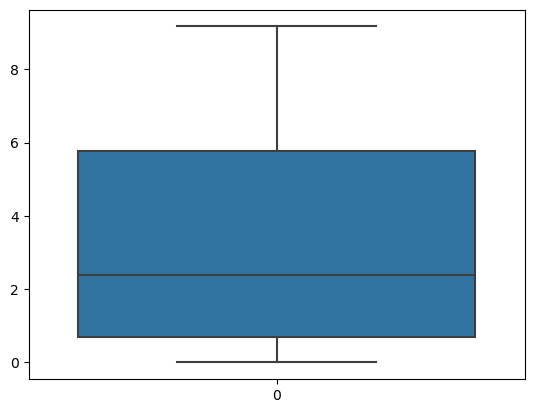

In [90]:
sns.boxplot(data['video_comment_count'])

In [91]:
# Apply log transformation
data['video_download_count'] = np.log1p(data['video_download_count'])  # log1p handles log(0) by adding 1


<Axes: >

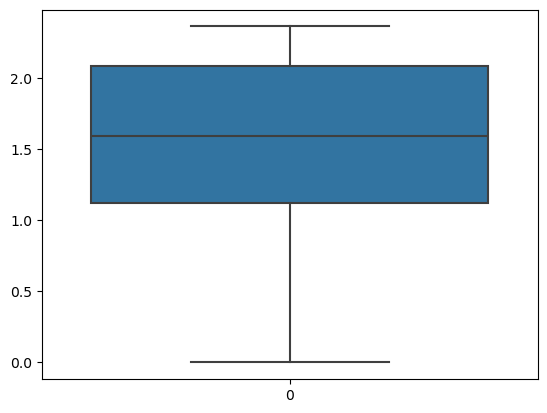

In [92]:
sns.boxplot(data['video_download_count'])

In [93]:
# Apply log transformation
data['video_share_count'] = np.log1p(data['video_share_count'])  # log1p handles log(0) by adding 1


<Axes: >

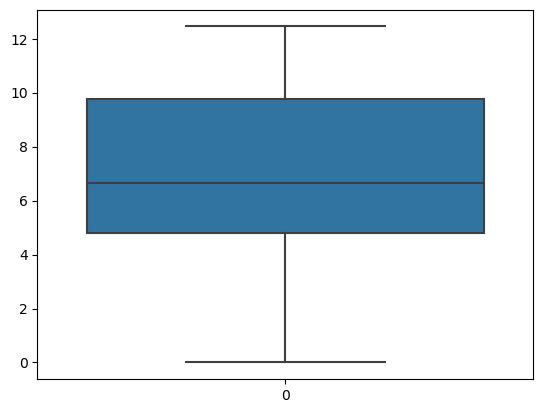

In [94]:
sns.boxplot(data['video_share_count'])

In [95]:
# Apply log transformation
data['video_like_count'] = np.log1p(data['video_like_count'])  # log1p handles log(0) by adding 1


<Axes: >

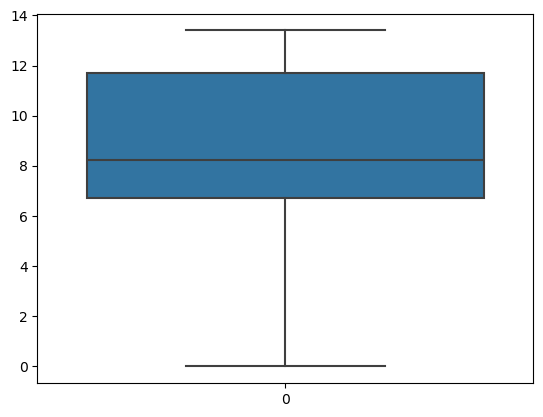

In [96]:
sns.boxplot(data['video_like_count'])

<Axes: >

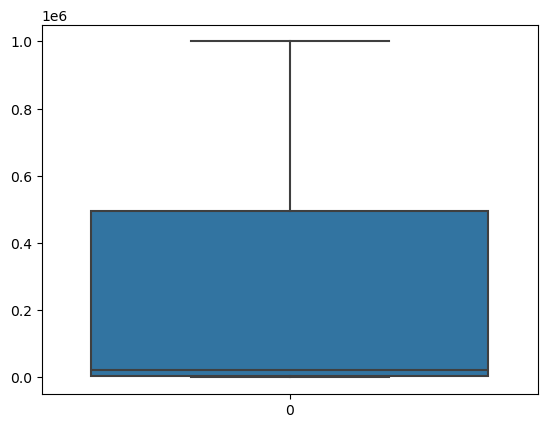

In [75]:
sns.boxplot(data['video_view_count'])

<Axes: >

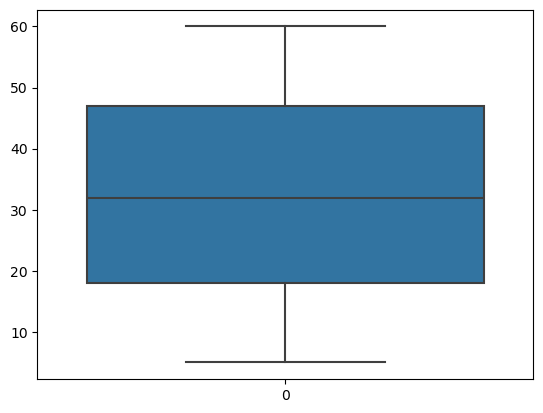

In [74]:
sns.boxplot(data['video_duration_sec'])

In [99]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling
scaler = MinMaxScaler()
data['video_view_count'] = scaler.fit_transform(data[['video_view_count']])


In [101]:
data['video_duration_sec'] = scaler.fit_transform(data[['video_duration_sec']])

In [103]:
data['transcription_length'] = scaler.fit_transform(data[['transcription_length']])

In [106]:
data.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,1,0.981818,0.343346,9.874368,5.488938,0.526589,0.000000,0.533333,1,0,0,0,1
1,1,0.490909,0.140886,11.256173,9.854035,2.086653,6.529419,0.633333,1,0,1,0,0
2,1,0.472727,0.902348,11.489565,7.958227,2.044621,5.799093,0.766667,1,0,1,0,0
3,1,0.363636,0.437575,12.388207,10.457746,2.094186,6.371612,0.800000,1,0,1,0,0
4,1,0.254545,0.056158,10.462760,8.321422,1.988734,5.030438,0.733333,1,0,1,0,0


# Modeling

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [108]:
x=data.drop(columns='claim_status',axis=1)
y=data['claim_status']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=10)
from sklearn.model_selection import cross_val_score
knn_score=[]
for k in range(1,21):
    knn_classifier =KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_score.append(score.mean())

In [112]:
knn_classifier =KNeighborsClassifier (n_neighbors=12)
score2=cross_val_score(knn_classifier,x,y,cv=10)
score2.mean()

0.9780725438569879

In [113]:
score=cross_val_score(randomforest_classifier,x,y,cv=10)
score.mean()

0.9950468388001219